# Credit EDA Case Study
## Problem Statement : 

> This case study aims to identify patterns which indicate if :

-A client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. 

-Ensuring that the consumers capable of repaying the loan are not rejected. 


> Identification of such applicants using EDA is the aim of this case study.

Submitted by `Siddhant Sareen` and `Gaurav Gianani`

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Reading and storing the dataframe in 'df'
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
#Checking number of rows, columns and datatypes
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                   

## Data Cleaning 
- Checking Missing Values
- Imputing values or dropping columns 
- Checking Outliers

In [4]:
# Storing columns in which 50% values are missing
df_null  =df.isnull().mean()*100 > 50

In [5]:
# 81 columns will be finally used 
df_null.value_counts()

False    81
True     41
dtype: int64

In [6]:
#Dropping columns with atleast 50% values missing 
df = df.dropna(thresh=len(df)*0.5,axis=1)

In [7]:
#Checking the resulting list of columns 
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
FLOORSMAX_MODE                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0

In [8]:
# Seperating Categorical and Numerical Data 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

In [9]:
df.shape

(307511, 81)

In [10]:
# Two seperate dataframes created to make data cleaning process more efficient 
df_num = df.select_dtypes(include=np.number)
df_cat = df.select_dtypes(exclude=np.number)

In [11]:
# Checking the shape of resulting dataframes 
print(df_num.shape,df_cat.shape)

(307511, 68) (307511, 13)


In [12]:
# Percentage missing values in numeric columns 
(df_num.isnull().sum()/len(df_num)*100).sort_values(ascending=False)

FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
TOTALAREA_MODE                  48.268517
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
FLAG_MOBIL                       0

In [13]:
# Percentage missing values in non-numeric columns 
(df_cat.isnull().sum()/len(df_cat)*100).sort_values(ascending=False)

EMERGENCYSTATE_MODE           47.398304
OCCUPATION_TYPE               31.345545
NAME_TYPE_SUITE                0.420148
ORGANIZATION_TYPE              0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
NAME_HOUSING_TYPE              0.000000
NAME_FAMILY_STATUS             0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_INCOME_TYPE               0.000000
FLAG_OWN_REALTY                0.000000
FLAG_OWN_CAR                   0.000000
CODE_GENDER                    0.000000
NAME_CONTRACT_TYPE             0.000000
dtype: float64

In [14]:
# Glancing at the Categorical dataframe 
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 13 columns):
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
OCCUPATION_TYPE               211120 non-null object
WEEKDAY_APPR_PROCESS_START    307511 non-null object
ORGANIZATION_TYPE             307511 non-null object
EMERGENCYSTATE_MODE           161756 non-null object
dtypes: object(13)
memory usage: 30.5+ MB


In [15]:
# Glancing at the numerical dataframe 
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 68 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
REGION_POPULATION_RELATIVE      307511 non-null float64
DAYS_BIRTH                      307511 non-null int64
DAYS_EMPLOYED                   307511 non-null int64
DAYS_REGISTRATION               307511 non-null float64
DAYS_ID_PUBLISH                 307511 non-null int64
FLAG_MOBIL                      307511 non-null int64
FLAG_EMP_PHONE                  307511 non-null int64
FLAG_WORK_PHONE                 307511 non-null int64
FLAG_CONT_MOBILE                307511 non-null int64
FLAG_PHONE   

In [16]:
#Seperating missing columns in a list for further exploration
missing_num_col = []
for i in df_num:
    if df_num[i].isnull().sum() > 0:
        missing_num_col.append(i)

In [17]:
# Checking the resulting list
missing_num_col

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

> Devising a strategy for imputation of missing values

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


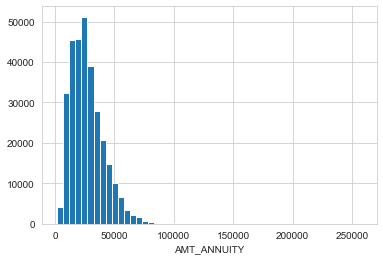

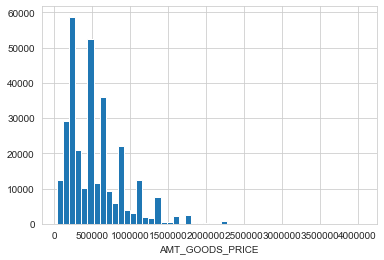

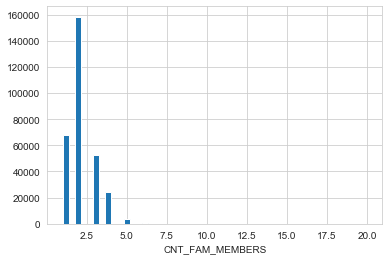

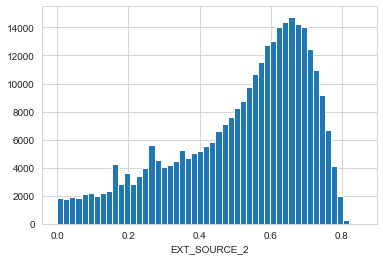

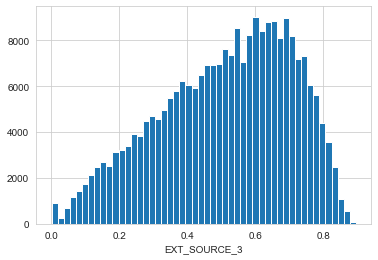

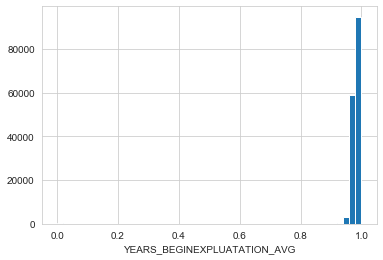

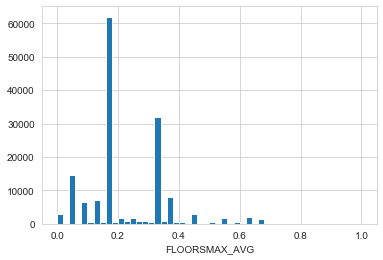

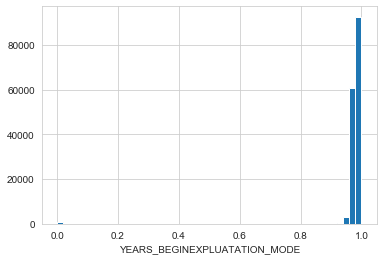

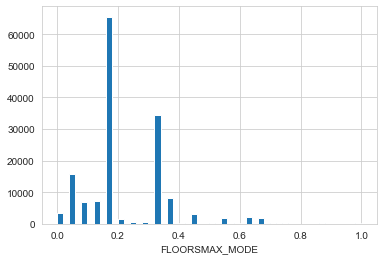

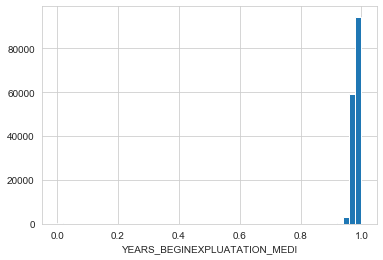

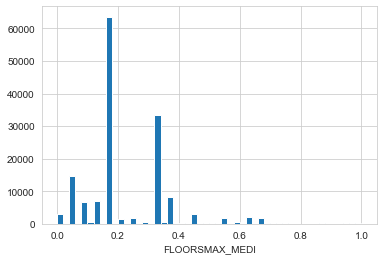

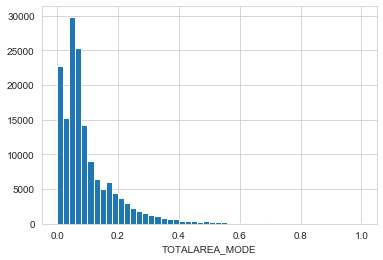

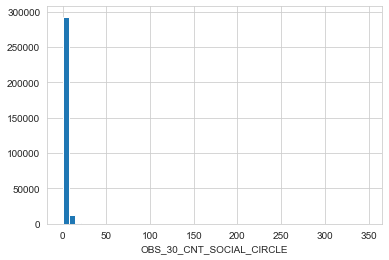

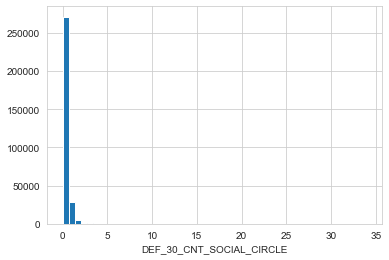

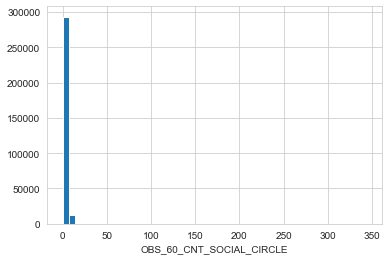

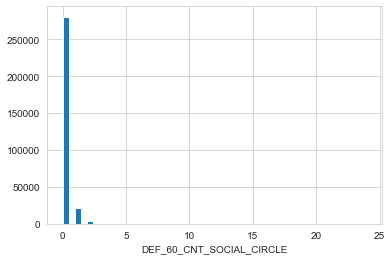

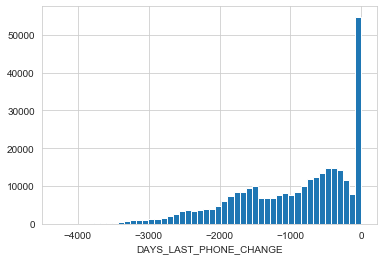

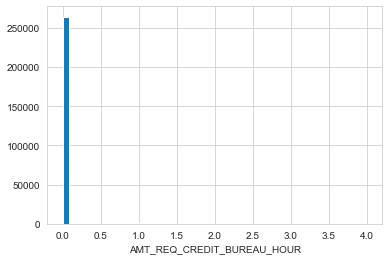

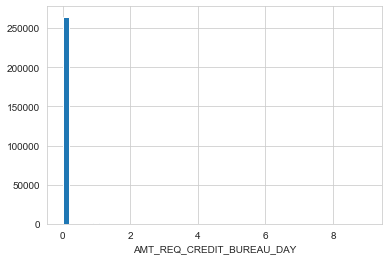

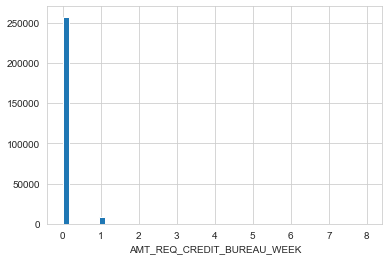

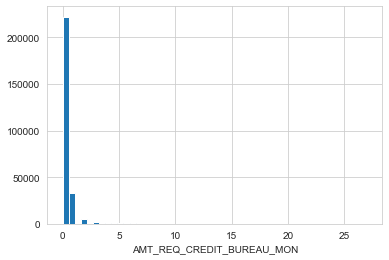

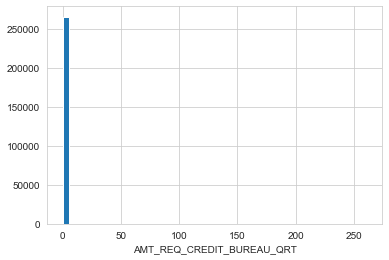

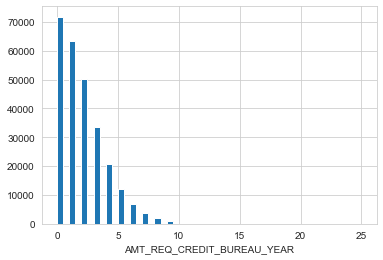

In [18]:
#Checking the nature of the data : Skewed or Centrally distributed
sns.set_style('whitegrid')
for i in missing_num_col:
    plt.hist(df[i],bins=50)
    plt.xlabel(i)
    plt.show();

- Seperating Skewed columns from centrally distributed columns 
- Using `median` for skewed columns 
- Using `mean` for centrally distributed column values for accurate representation

In [19]:
#List of skewed numeric columns 
skewed = ['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'CNT_FAM_MEMBERS',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

In [20]:
# Imputing median values for skewed data to get an approximate aggregation
for i in skewed:
    df_num[i].fillna(df_num[i].median(),inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [21]:
# Rechecking the resulting data for missing values 
df_num.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                         0
AMT_GOODS_PRICE                     0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE                          0
FLAG_EMAIL                          0
CNT_FAM_MEMBERS                     0
REGION_RATING_CLIENT                0
REGION_RATING_CLIENT_W_CITY         0
HOUR_APPR_PROCESS_START             0
REG_REGION_NOT_LIVE_REGION          0
REG_REGION_NOT_WORK_REGION          0
LIVE_REGION_NOT_WORK_REGION         0
REG_CITY_NOT_LIVE_CITY              0
REG_CITY_NOT

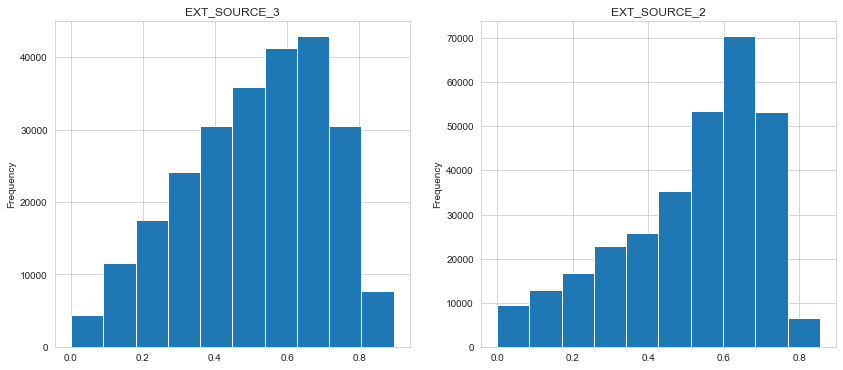

In [22]:
#Imputing the remaining two numeric columns 
#Not Skewed so can use mean 
sns.set_style('whitegrid')
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
df_num['EXT_SOURCE_3'].plot.hist()
plt.title('EXT_SOURCE_3')
plt.subplot(1,2,2)
df_num['EXT_SOURCE_2'].plot.hist()
plt.title('EXT_SOURCE_2');

In [23]:
# Replacing NaNs with the mean of the data 
df_num['EXT_SOURCE_2'].fillna(df_num.EXT_SOURCE_2.mean(),inplace=True)
df_num['EXT_SOURCE_3'].fillna(df_num.EXT_SOURCE_3.mean(),inplace=True)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


> Cleaning Categorical columns ahead :

In [24]:
# Now onto Categorical columns 
df_cat.isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
EMERGENCYSTATE_MODE           145755
dtype: int64

In [25]:
# checking distrubution of NAME_TYPE_SUITE column
df_cat['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

In [26]:
# Replacing NaNs with the mode of the data 
df_cat['NAME_TYPE_SUITE'].fillna(df_cat['NAME_TYPE_SUITE'].mode()[0],inplace=True)

In [27]:
# checking distrubution of OCCUPATION_TYPE column
df_cat['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [28]:
# Checking the distribution of EMERGENCYSTATE_MODE column
df_cat['EMERGENCYSTATE_MODE'].value_counts(normalize=True)

No     0.985608
Yes    0.014392
Name: EMERGENCYSTATE_MODE, dtype: float64

In [29]:
# Replacing NaNs with the mode of the data 
df_cat['OCCUPATION_TYPE'].fillna(df_cat['OCCUPATION_TYPE'].mode()[0],inplace=True)
df_cat['EMERGENCYSTATE_MODE'].fillna(df_cat['EMERGENCYSTATE_MODE'].mode()[0],inplace=True)

In [30]:
# Rechecking missing values in numerical columns 
df_num.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
CNT_FAM_MEMBERS                 0
REGION_RATING_CLIENT            0
REGION_RATING_CLIENT_W_CITY     0
HOUR_APPR_PROCESS_START         0
REG_REGION_NOT_LIVE_REGION      0
REG_REGION_NOT_WORK_REGION      0
LIVE_REGION_NOT_WORK_REGION     0
REG_CITY_NOT_LIVE_CITY          0
REG_CITY_NOT_WORK_CITY          0
LIVE_CITY_NOT_WORK_CITY         0
EXT_SOURCE_2                    0
EXT_SOURCE_3  

In [31]:
# Rechecking missing values in non - numerical columns 
df_cat.isnull().sum()

NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
FLAG_OWN_REALTY               0
NAME_TYPE_SUITE               0
NAME_INCOME_TYPE              0
NAME_EDUCATION_TYPE           0
NAME_FAMILY_STATUS            0
NAME_HOUSING_TYPE             0
OCCUPATION_TYPE               0
WEEKDAY_APPR_PROCESS_START    0
ORGANIZATION_TYPE             0
EMERGENCYSTATE_MODE           0
dtype: int64

> Creating a cleaned dataframe `df_final` with no missing values

In [32]:
# Concatenating the two (df_cat,df_num) to generate a final dataframe (df_final)
df_final = pd.concat([df_num,df_cat],axis=1,sort=False)

In [33]:
#Checking the resulting dataframe df_final
df_final.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,EMERGENCYSTATE_MODE
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,No
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,No
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,No
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,No


## Feature Engineering
- Creating an Age Group column for further analysis 

In [34]:
# Process of creating an Age Group column
df_final['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [35]:
# Cleaning the Age column
df_final['DAYS_BIRTH'] = df_final['DAYS_BIRTH'].astype(str)
df_final['DAYS_BIRTH'] = df_final['DAYS_BIRTH'].apply(lambda x : x.lstrip('-'))
df_final['DAYS_BIRTH'] = df_final['DAYS_BIRTH'].astype(int)

In [36]:
df_final['DAYS_BIRTH']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [37]:
# Converting days to years 
df_final['Age']= df_final['DAYS_BIRTH'].apply(lambda x : x//365)
df_final.drop('DAYS_BIRTH',axis=1,inplace=True)

In [38]:
#Created Age column
df_final['AGE_GROUP'] = pd.cut(df_final['Age'],bins = 3, labels=['Young','Middle-Aged','Elderly'])
df_final.drop('Age',axis=1,inplace=True)

In [39]:
# Selecting Numerical Columns 
df_final.iloc[:,2:60]

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.262949,0.139376,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,11,0,0,0,0,0,0,0.622246,0.510853,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,9,0,0,0,0,0,0,0.555912,0.729567,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-3039,-9833.0,-2437,1,1,0,1,0,0,2.0,2,2,17,0,0,0,0,0,0,0.650442,0.510853,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-3038,-4311.0,-3458,1,1,0,1,0,0,1.0,2,2,11,0,0,0,0,1,1,0.322738,0.510853,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.0688,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,157500.0,254700.0,27558.0,225000.0,0.032561,-236,-8456.0,-1982,1,1,0,1,0,0,1.0,1,1,15,0,0,0,0,0,0,0.681632,0.510853,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,0.0,0.0,0.0,0.0,-273.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,72000.0,269550.0,12001.5,225000.0,0.025164,365243,-4388.0,-4090,1,0,0,1,1,0,1.0,2,2,8,0,0,0,0,0,0,0.115992,0.510853,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,153000.0,677664.0,29979.0,585000.0,0.005002,-7921,-6737.0,-5150,1,1,0,1,0,1,1.0,3,3,9,0,0,0,0,1,1,0.535722,0.218859,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,6.0,0.0,6.0,0.0,-1909.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,171000.0,370107.0,20205.0,319500.0,0.005313,-4786,-2562.0,-931,1,1,0,1,0,0,2.0,2,2,9,0,0,0,1,1,0,0.514163,0.661024,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,0.0,0.0,0.0,0.0,-322.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


> Correlation Matrix

In [40]:
#Printing the highly correlated numerical columns 
corr = df_final.iloc[:,2:60].corr().unstack().sort_values(ascending=False)
corr = corr[corr != 1.0 ]
corr = corr[corr > 0.7 ] 
print(corr)

OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998491
OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998491
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997260
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997260
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.993838
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.993838
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989001
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989001
AMT_GOODS_PRICE               AMT_CREDIT                      0.986734
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986734
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986610
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986610
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.971950
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.971950
YEARS_

> Choosing Numerical continous variables used for further analysis

In [41]:
# Listing out highly correlated continous variables for analysis 
high_corr_num = list([                          
'CNT_FAM_MEMBERS',              
'CNT_CHILDREN',                  
'AMT_GOODS_PRICE',     
'AMT_CREDIT',            
'AMT_ANNUITY'])                  

## Univariate Analysis - Numerical 

> Boxplots are used to identify spread and detect outliers

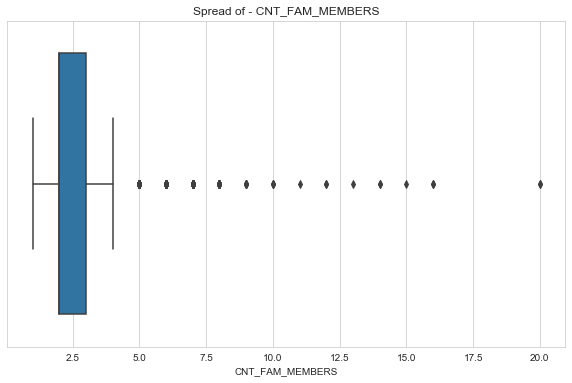

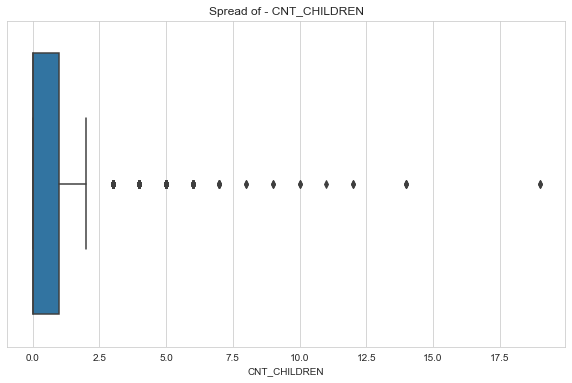

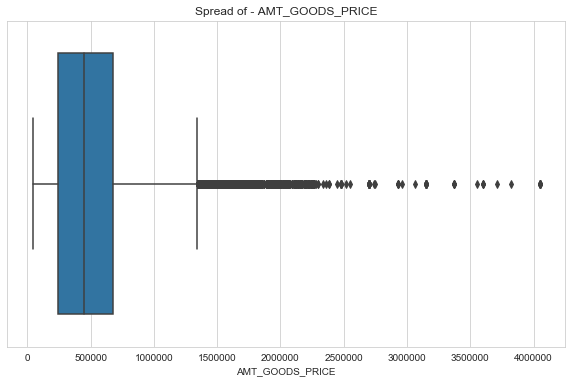

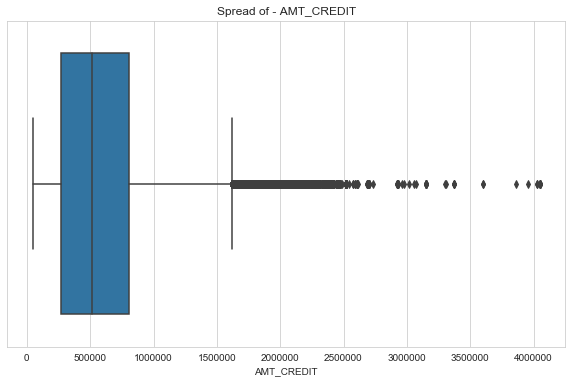

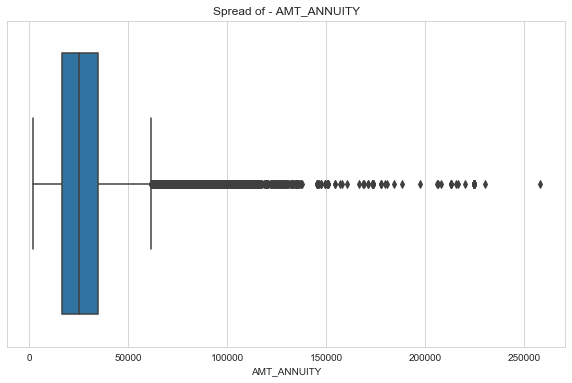

In [42]:
#Checking the distribution 
for i in high_corr_num:
    plt.figure(figsize=[10,6])
    sns.boxplot(df_final[i])
    plt.title('Spread of - '+ i);
    #plt.xscale('log')

 > Inferences generated from the plots above : 
 - The largest loan application amount is 4,050,000 whereas the average application is valued at 599,025
 - The most annuity for a client stands at 258,025 which is a significant outlier
 - The largest goods price of an application is 4,050,000, which matches the largest credit amount thus making it a high value consumer loan 
 - The average family size is 2, with some values going over 10 people in a family
 - 95 % of people have 2 children or less 

## Univariate Analysis - Categorical

In [43]:
cat_col = list(df_cat.columns)
cat_col.append('AGE_GROUP')

In [44]:
print(cat_col)

['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE', 'AGE_GROUP']


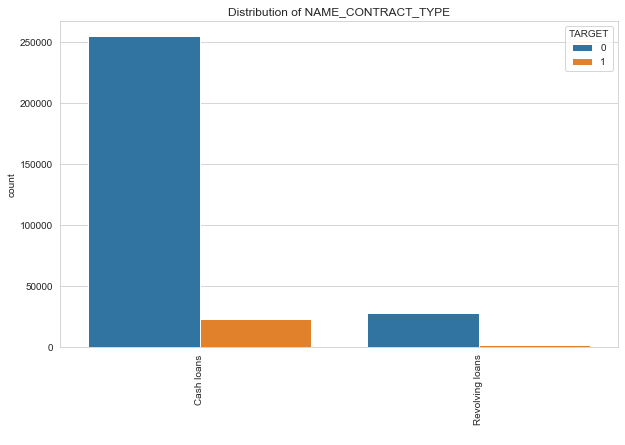

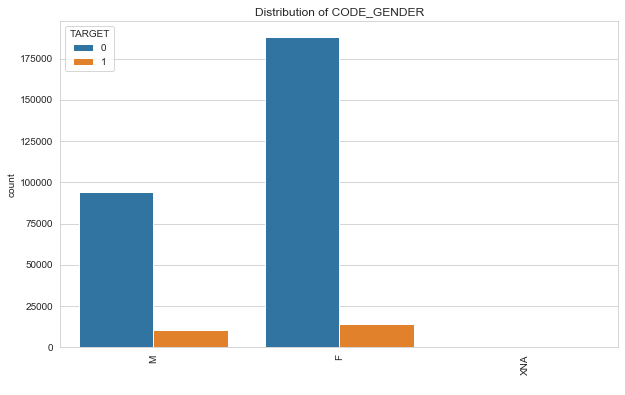

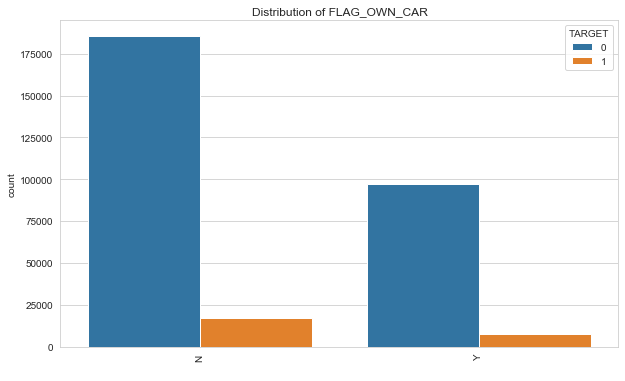

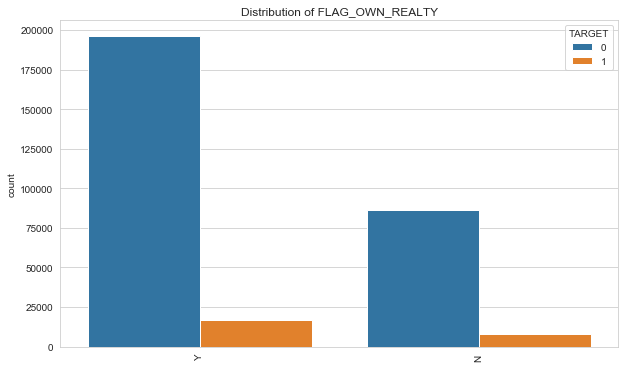

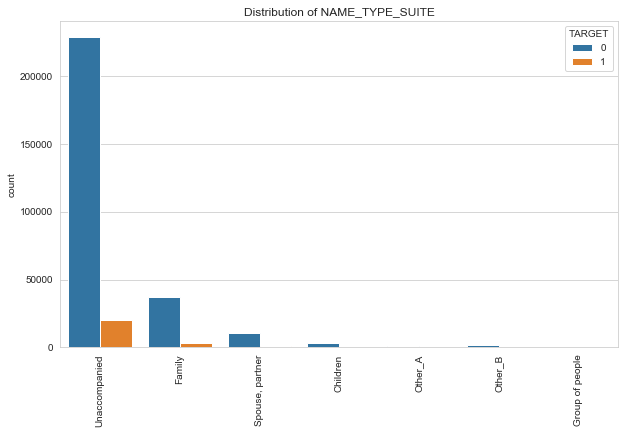

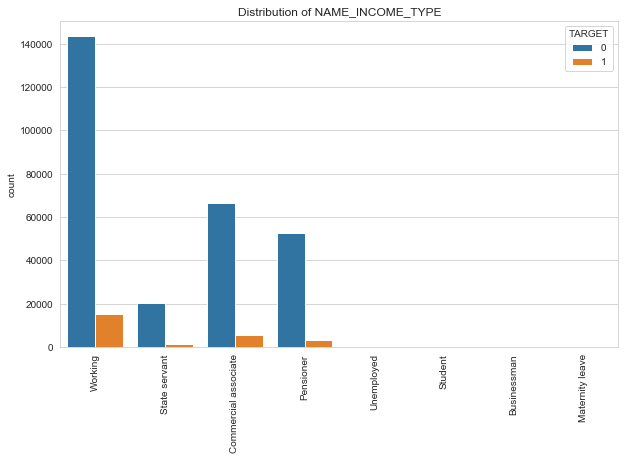

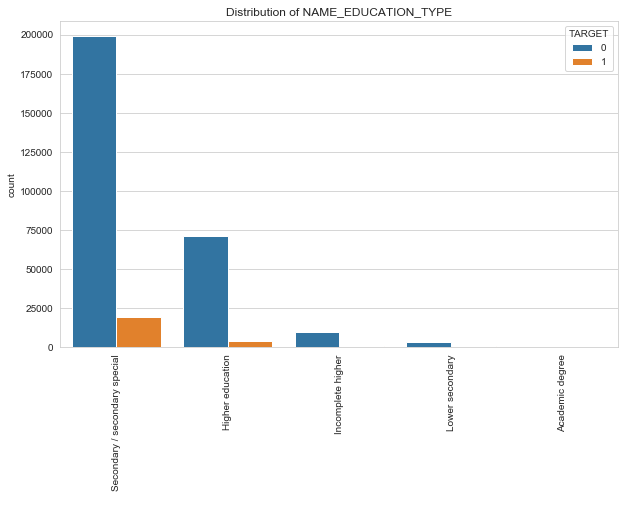

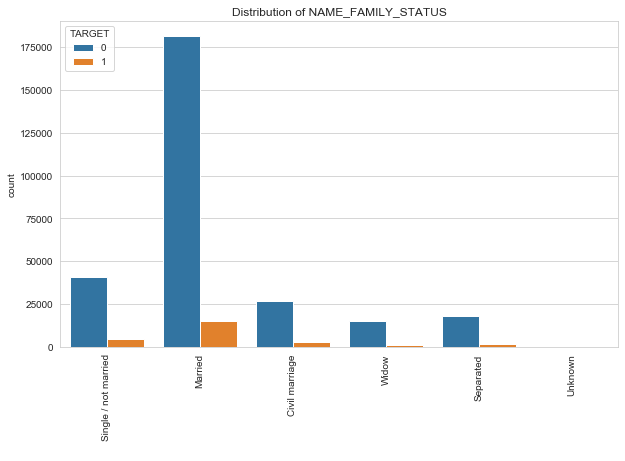

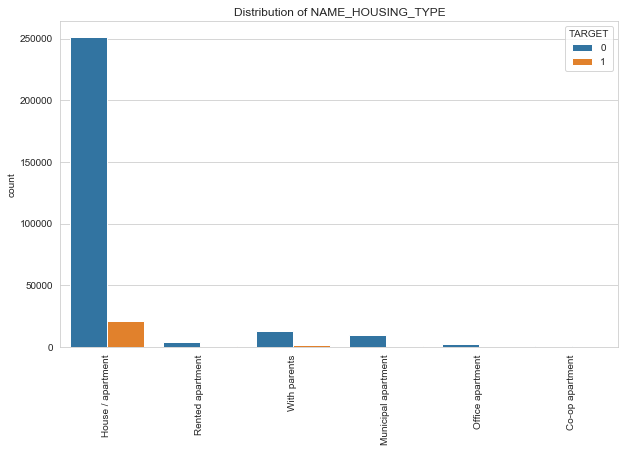

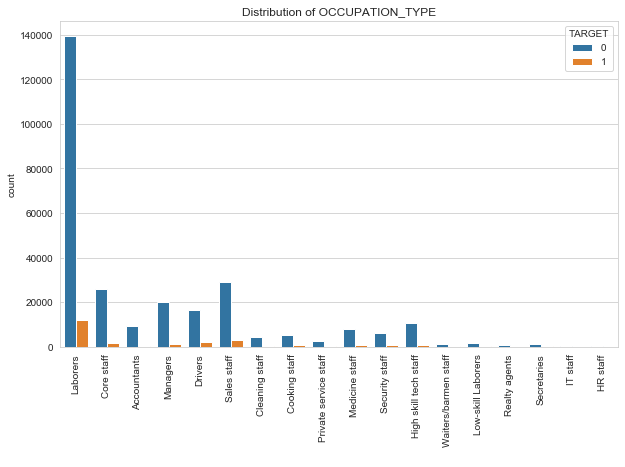

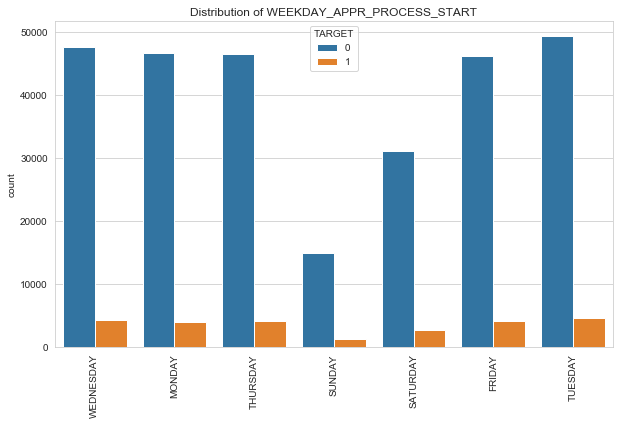

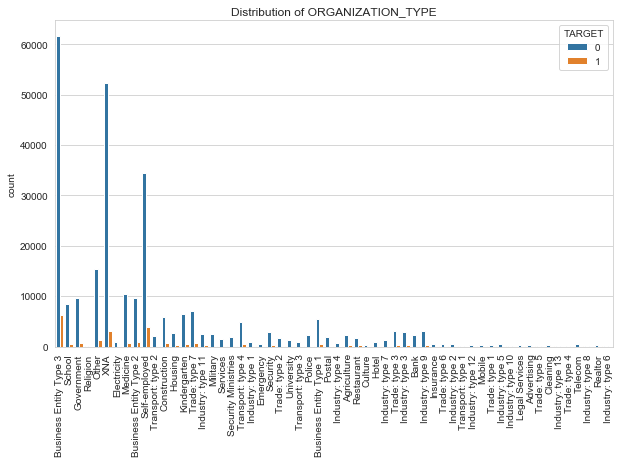

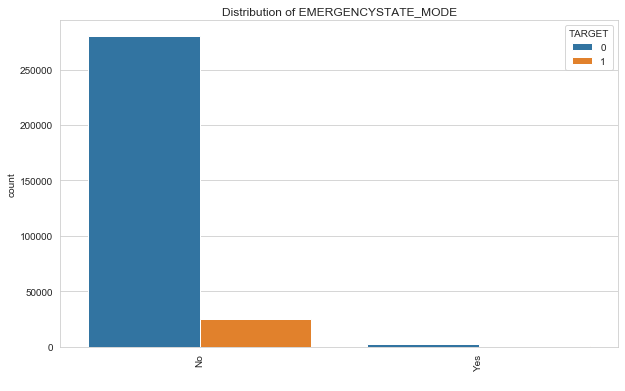

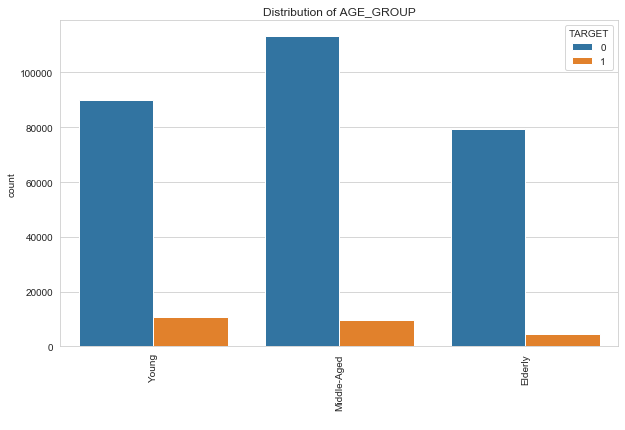

In [45]:
for i in cat_col:
    plt.figure(figsize=[10,6])
    sns.countplot(df_final[i],hue=df_final['TARGET'])
    plt.xticks(rotation=90)
    plt.xlabel(' ')
    plt.title('Distribution of '+i);


## Univariate Categorical Analysis
#### Inferences :
> Contract Type 
- Cash loans seem to be the preferred option over revolving loans 

> Gender Distribution 
- Females seem to apply for credit almost twice as much as males 
- A larger share of Male clients seem to have payment difficulties 

> Flag Own Car (Car Ownership)
- Clients who don't have a car frequently apply for credit 

> Flag Own Realty (Real estate ownership)
- Those who own real estate apply for significantly more credit
- People owning real estate seem to have lesser payment difficulties

> Name Type Suite (Residence)
- Most of our clients live unaccompanied

> Income Type 
- Most of our clients are working class people
- Businessmen don't use our credit facilities much

> Education Type
- People with secondary education apply for the most credit

## Bivariate Analysis

<Figure size 1080x720 with 0 Axes>

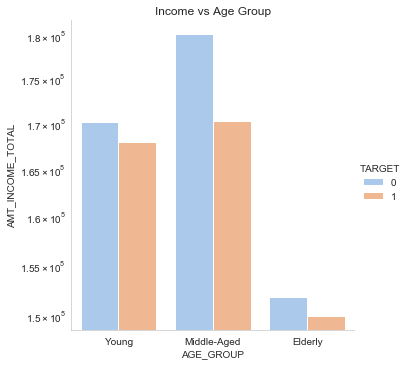

In [46]:
plt.figure(figsize=[15,10])
sns.catplot(data=df_final,x='AGE_GROUP',y='AMT_INCOME_TOTAL',hue='TARGET',kind='bar',palette='pastel',ci=None)
plt.title('Income vs Age Group')
plt.yscale('log');

> Inferences 
- Highly paid Middle-Aged people seem to pay back loans thus are low risk clients 
- Almost half of our our younger clients don't seem to have payment difficulties
- Elderly clients earn the least 

<Figure size 1080x720 with 0 Axes>

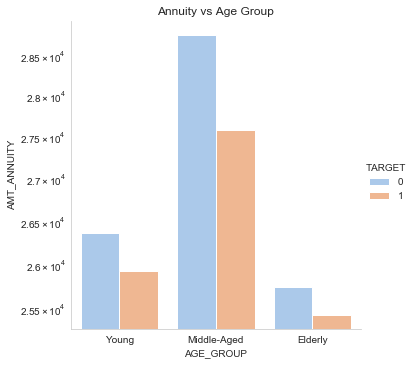

In [47]:
plt.figure(figsize=[15,10])
sns.catplot(data=df_final,x='AGE_GROUP',y='AMT_ANNUITY',hue='TARGET',kind='bar',palette='pastel',ci=None)
plt.title('Annuity vs Age Group')
plt.yscale('log');

> Inferences based on Annuity
-  Middle-Aged people have higher annuity
-  People earning more have higher annuity as similar patterns are observed in the above two plots  

<Figure size 1080x720 with 0 Axes>

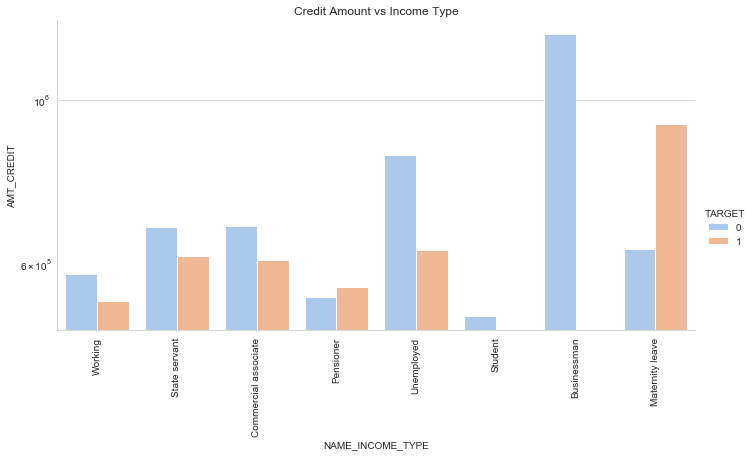

In [48]:
plt.figure(figsize=[15,10])
sns.catplot(data=df_final,x='NAME_INCOME_TYPE',y='AMT_CREDIT',hue='TARGET',kind='bar',palette='pastel',aspect=2,ci=None)
plt.title('Credit Amount vs Income Type')
plt.xticks(rotation=90)
plt.yscale('log');

> Inferences based on Income Sources 
- Businessmen seem to take high value credit and have no payment difficulties
- Clients placed in maternity leaves start facing payment difficulties
- Working class people and Pensioners take low amounts of credit each time

<Figure size 1080x720 with 0 Axes>

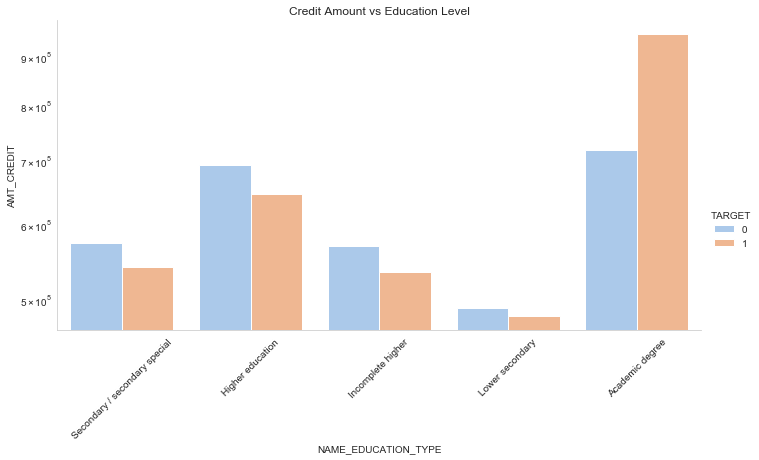

In [49]:
plt.figure(figsize=[15,10])
sns.catplot(data=df_final,x='NAME_EDUCATION_TYPE',y='AMT_CREDIT',hue='TARGET',kind='bar',palette='pastel',aspect=2,ci=None)
plt.title('Credit Amount vs Education Level')
plt.xticks(rotation=45)
plt.yscale('log');

> Inferences based on Education Level
- Academic degree holders seem to apply for huge credit sums and end up having payment difficulties
- People holding lower - secondary education apply for smaller loans 

<Figure size 1080x720 with 0 Axes>

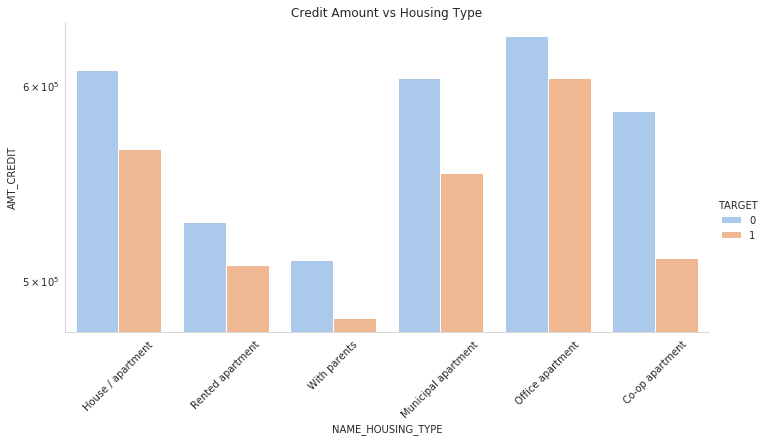

In [50]:
plt.figure(figsize=[15,10])
sns.catplot(data=df_final,x='NAME_HOUSING_TYPE',y='AMT_CREDIT',hue='TARGET',kind='bar',palette='pastel',aspect=2,ci=None)
plt.rcParams.update(plt.rcParamsDefault)
plt.xticks(rotation=45)
plt.title('Credit Amount vs Housing Type')
plt.yscale('log');

> Inferences based on Housing Type 
- People living in Houses and office apartments are high value customers
- People living with parents take lower loan amounts 
- People living Co-op have the least payment difficulties

## Multivariate Analysis 

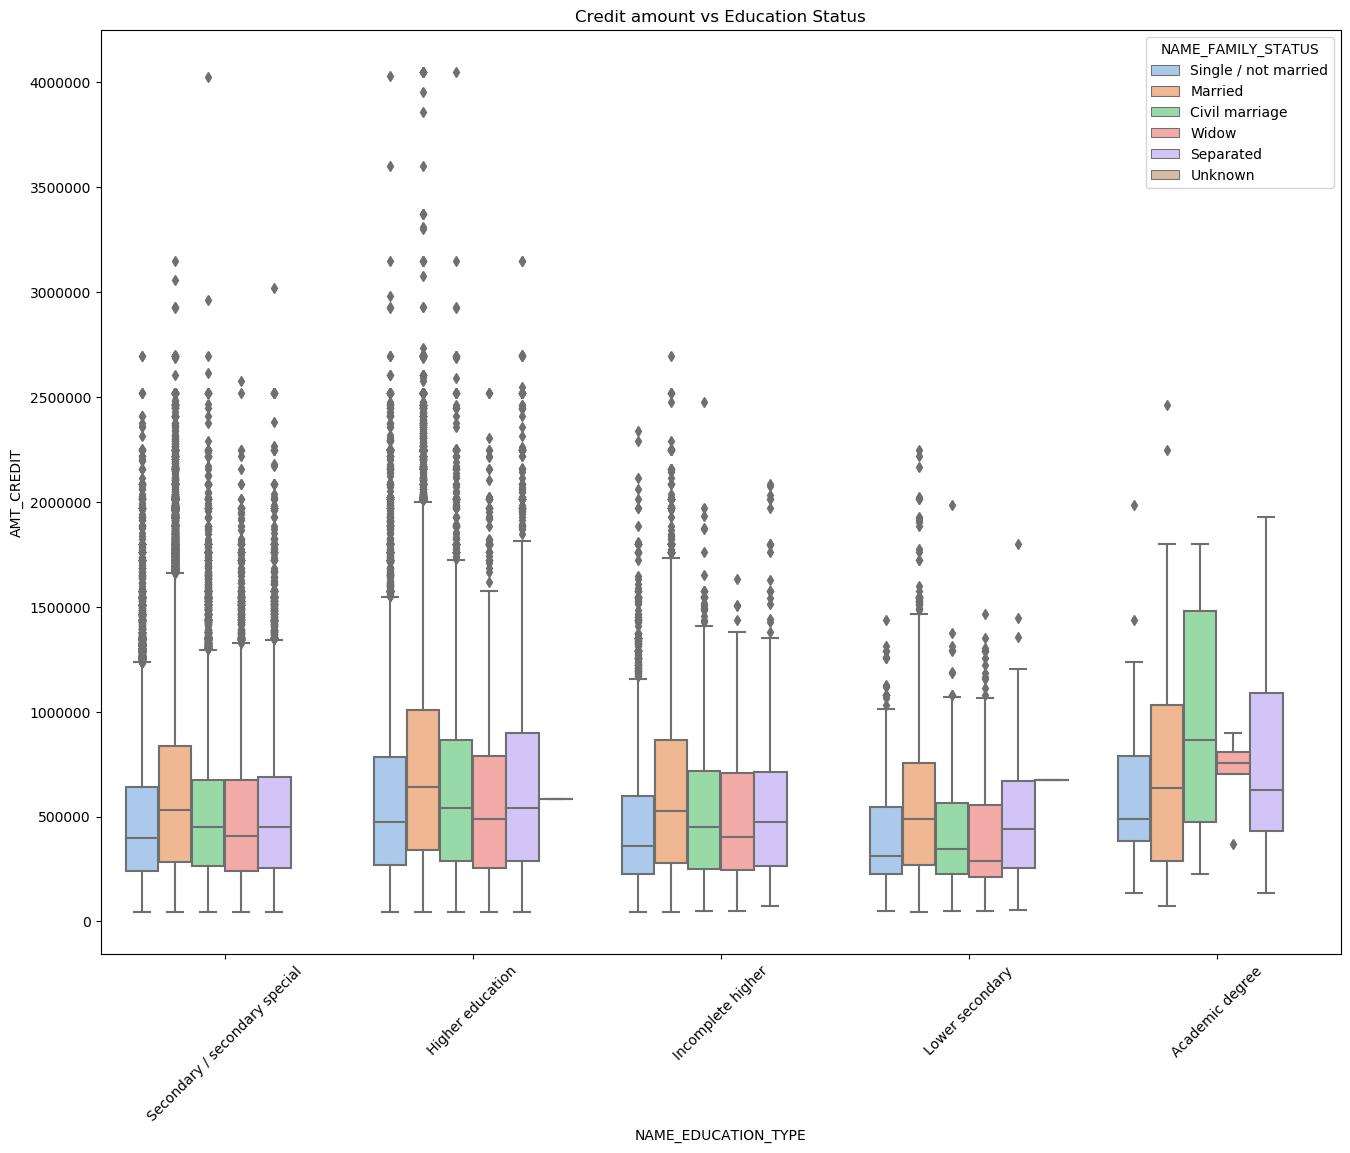

In [51]:
plt.figure(figsize=(16,12))
plt.xticks(rotation=45)
sns.boxplot(data =df_final, x='NAME_EDUCATION_TYPE',y='AMT_CREDIT', hue ='NAME_FAMILY_STATUS',orient='v',palette='pastel')
plt.title('Credit amount vs Education Status')
plt.show()

> Inferences based on Education Levels and Family type
- Married clients with Higher Education go for high loan amounts 
- Single clients go for lower amounts for all education levels 
- Higher Education and Secondary Education clients are of highest value with median values for both categories around 500,000

## Further Analysis using `Previous Application` data

In [52]:
prev = pd.read_csv('previous_application.csv')
prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
prev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [54]:
#Intersecting the two dataframes for further analysis
df_final2=pd.merge(left=df_final,right=prev,how='inner',on='SK_ID_CURR',suffixes='_x')

In [55]:
# Renaming the column names after merging (Removal of suffixes)

df_final2 = df_final2.rename({'NAME_CONTRACT_TYPE_' : 'NAME_CONTRACT_TYPE','AMT_CREDIT_':'AMT_CREDIT','AMT_ANNUITY_':'AMT_ANNUITY',
                         'WEEKDAY_APPR_PROCESS_START_' : 'WEEKDAY_APPR_PROCESS_START',
                         'HOUR_APPR_PROCESS_START_':'HOUR_APPR_PROCESS_START','NAME_CONTRACT_TYPEx':'NAME_CONTRACT_TYPE_PREV',
                         'AMT_CREDITx':'AMT_CREDIT_PREV','AMT_ANNUITYx':'AMT_ANNUITY_PREV',
                         'WEEKDAY_APPR_PROCESS_STARTx':'WEEKDAY_APPR_PROCESS_START_PREV',
                         'HOUR_APPR_PROCESS_STARTx':'HOUR_APPR_PROCESS_START_PREV'}, axis=1)



In [56]:
# Dropping the Extra columns 
df_final2.drop(['SK_ID_CURR','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION', 
              'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
              'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_START_PREV',
              'HOUR_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY'],axis=1,inplace=True)

In [57]:
# removing XNA, XAP - Values not available
df_final2=df_final2.drop(df_final2[df_final2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_final2=df_final2.drop(df_final2[df_final2['NAME_CASH_LOAN_PURPOSE']=='XNA'].index)
df_final2=df_final2.drop(df_final2[df_final2['NAME_CASH_LOAN_PURPOSE']=='XAP'].index)

> Univariate Analysis 
- Understanding purposes of loans 
- Replayment capabilities of clients from various sectors

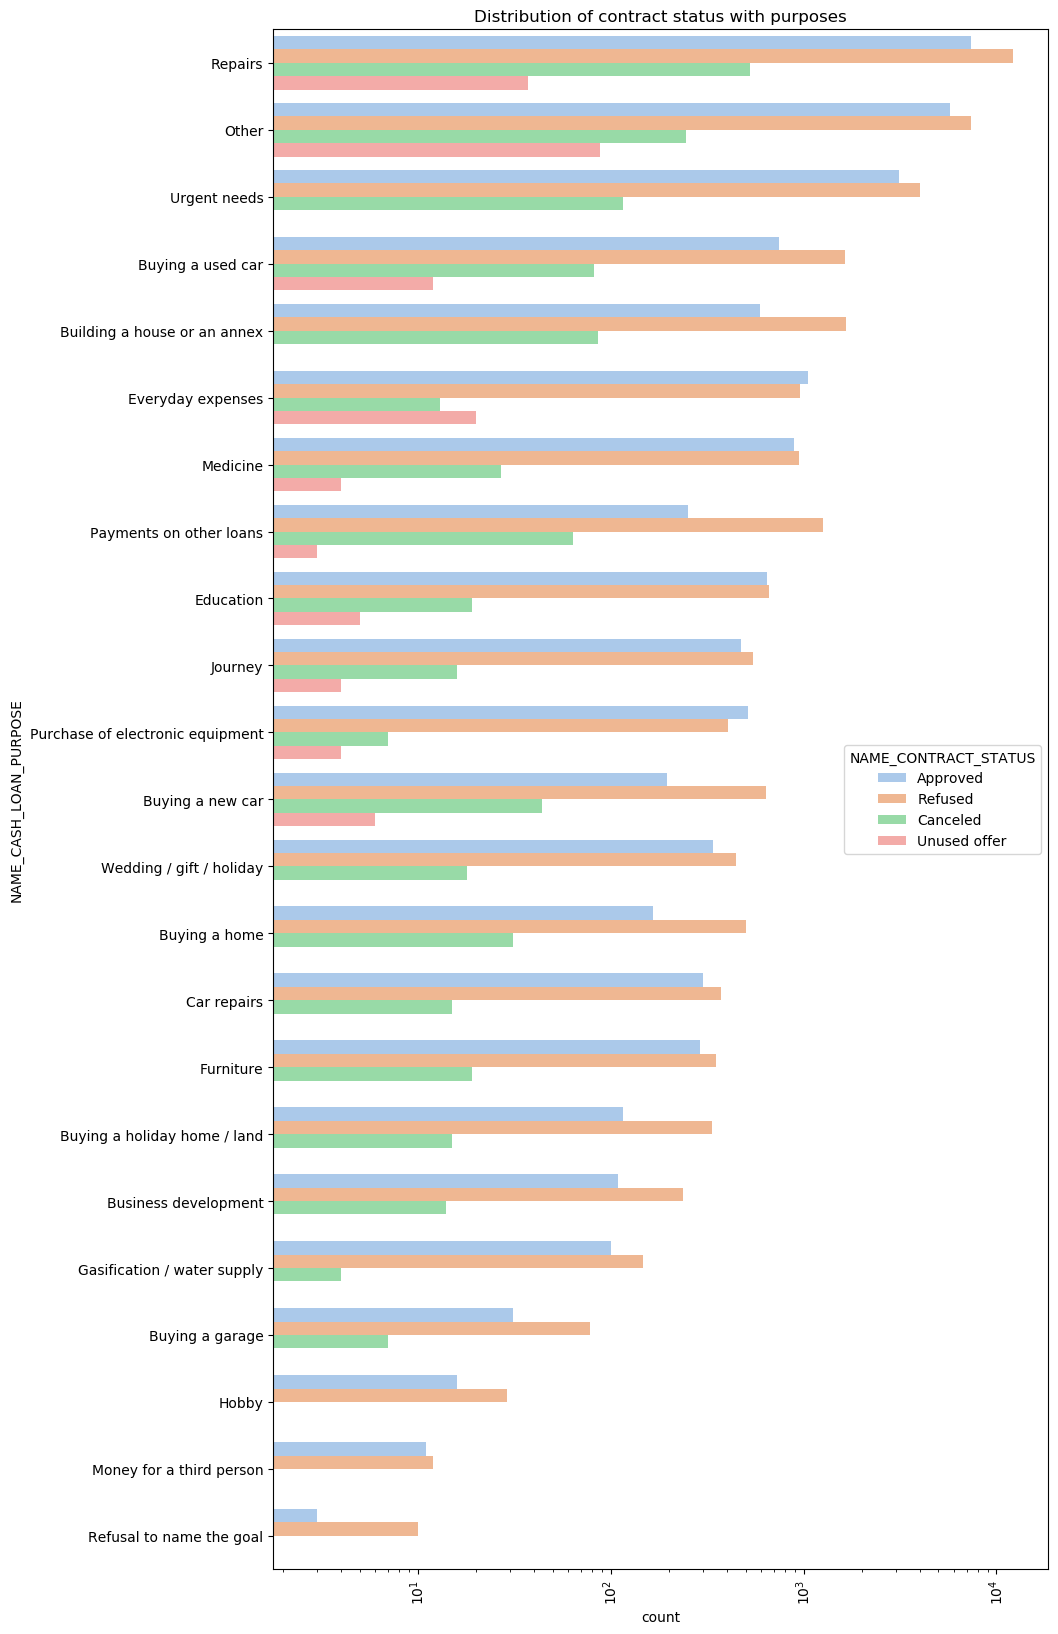

In [58]:
plt.figure(figsize=(10,20))
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of contract status with purposes')
sns.countplot(data = df_final2, y= 'NAME_CASH_LOAN_PURPOSE', 
                   order=df_final2['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel') 

> Inferences 
- Loans are applied for `Repairs` the most, with high refusal rate
- Refusal rate for `Payments on other loans` category is very high 
- Loans applied for `Everyday expenses` are mostly approved
- `Other` category has high unused loans 

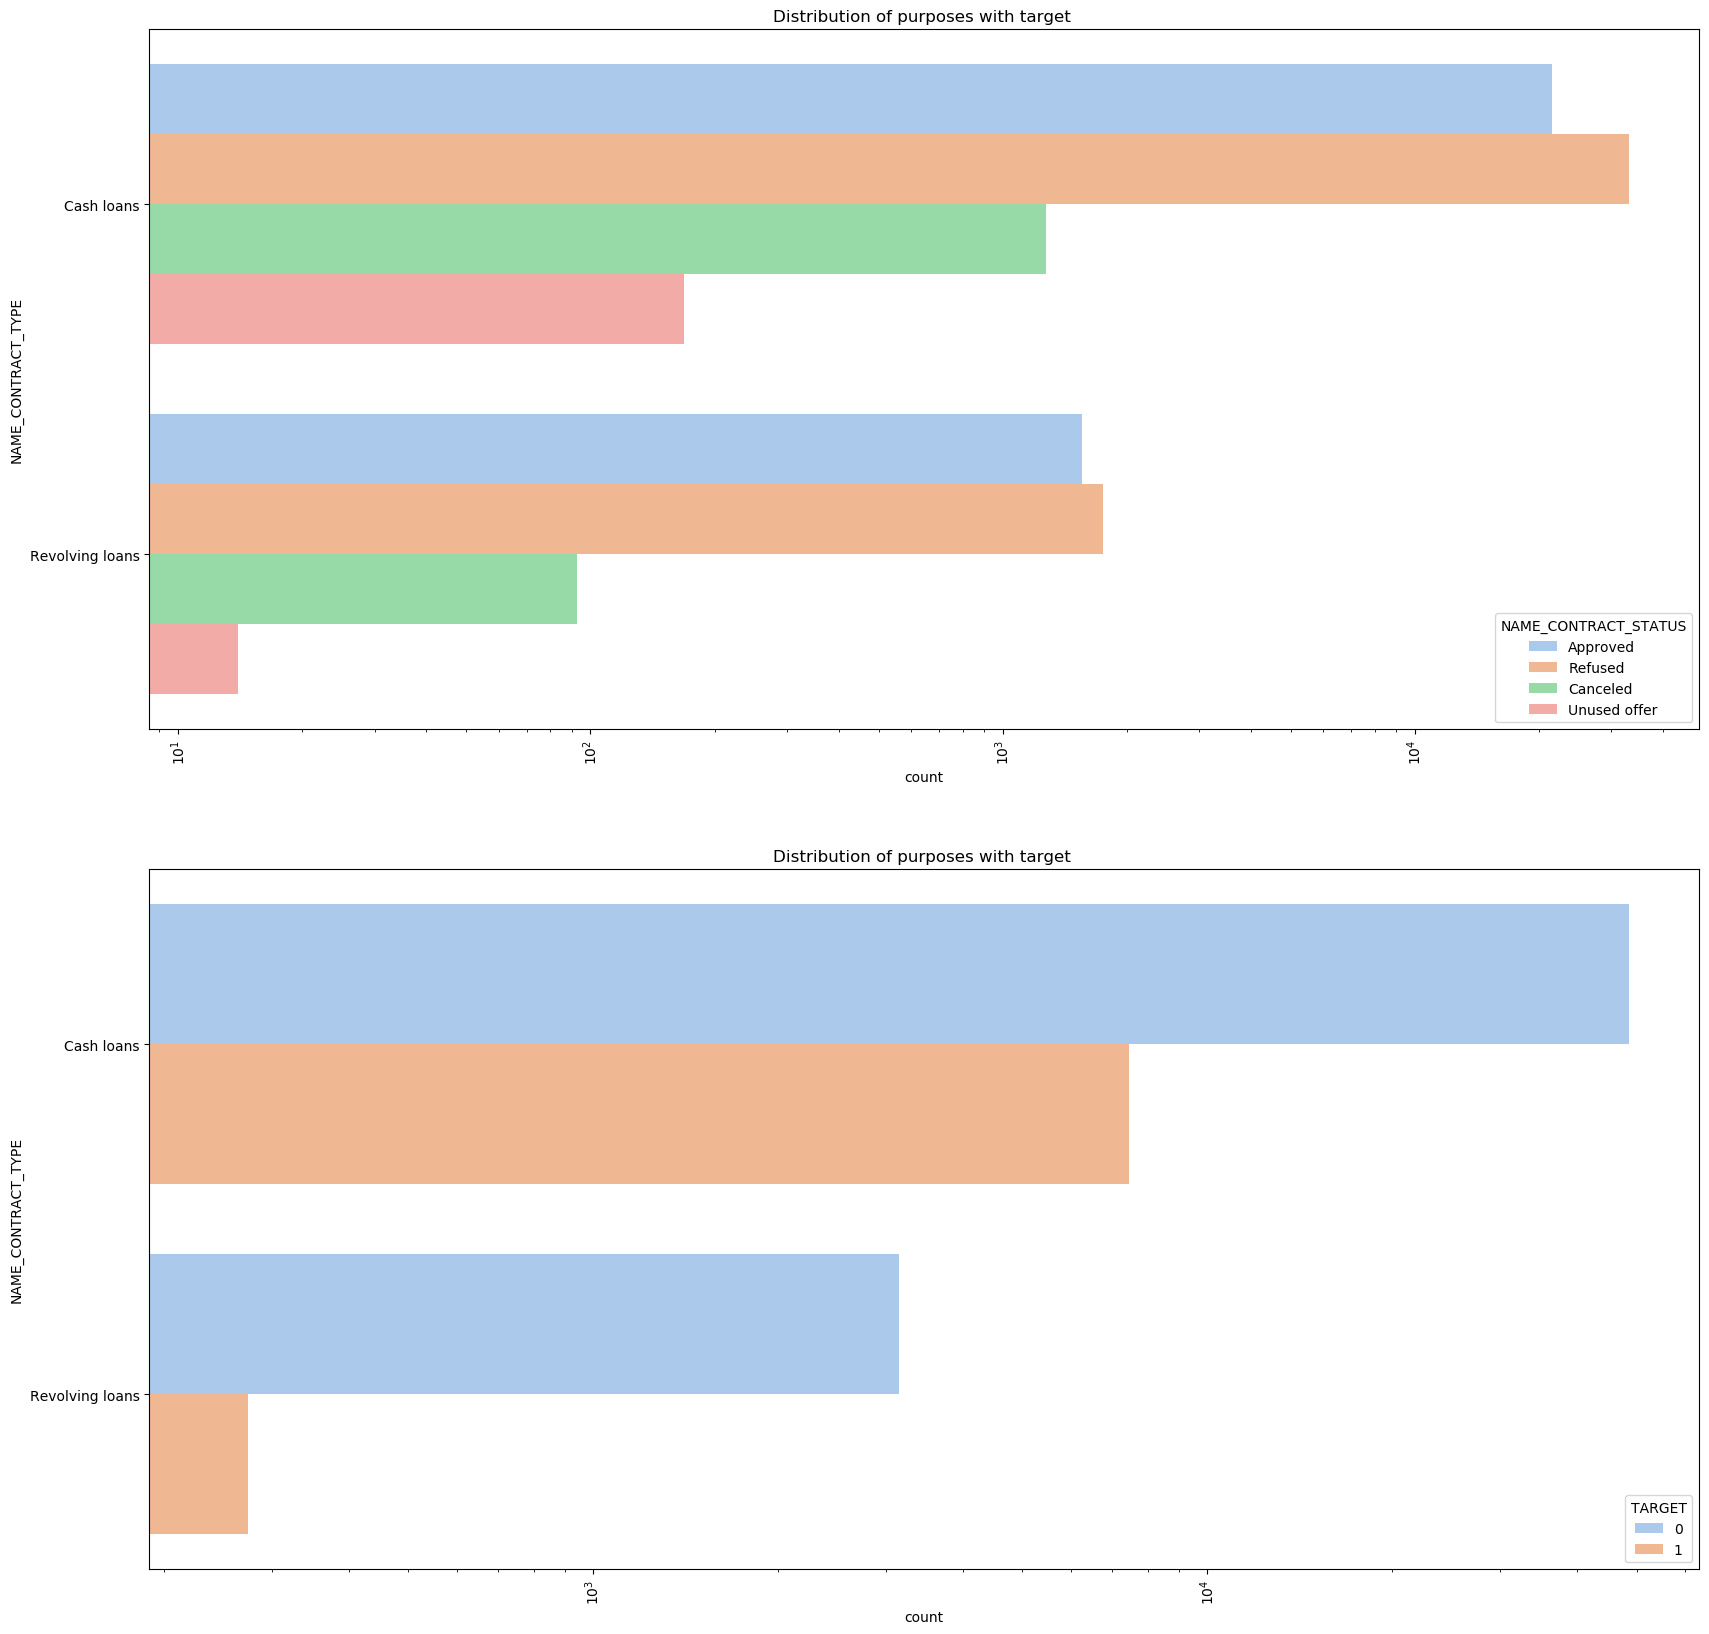

In [59]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data = df_final2, y= 'NAME_CONTRACT_TYPE', 
                   order=df_final2['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='pastel')
plt.subplot(2,1,2)
plt.xticks(rotation=90)
plt.xscale('log')
plt.title('Distribution of purposes with target ')
sns.countplot(data = df_final2, y= 'NAME_CONTRACT_TYPE', 
                   order=df_final2['NAME_CONTRACT_TYPE'].value_counts().index,hue = 'TARGET',palette='pastel') 

> Inferences 
- Cash loans are major business source but a high number of them are refused
- High number of cash loans result in `Unused offers`
- Revolving Loans are low risk as clients have very little payment difficulties

## Final Conclusions 
- Banks should focus more on contract type ‘Student’ ,’pensioner’ and ‘Businessman’ with
housing ‘type other than ‘Co-op apartment’ for successful payments.

- Banks should re-evaluate strategy for income type ‘Working’ as they are having most number of
unsuccessful payments while still remaining the most frequent customers

- Loan purpose ‘Repair’ is having higher number of unsuccessful payments on
time.

- Get as much as clients from housing type ‘With parents’ as they are having least number of
unsuccessful payments.

- Cash Loan offers should be improved so as to reduce unused offers and increased business